# ARMA AND ARIMA TIME SERIES ANALYSIS

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
import seaborn as sb
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,6)

%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,acovf,pacf,pacf_ols,pacf_yw

In [3]:
df=pd.read_csv("F:\\DS,Courses\\Udemy - Python for Time Series Data Analysis\\TSA_COURSE_NOTEBOOKS\Data\\airline_passengers.csv",index_col='Month',parse_dates=True)
df.index.freq='MS'

df1=pd.read_csv("F:\\DS,Courses\\Udemy - Python for Time Series Data Analysis\\TSA_COURSE_NOTEBOOKS\Data\\DailyTotalFemaleBirths.csv",index_col='Date',parse_dates=True)
df1.index.freq='D'

In [4]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
print(auto_arima(df1['Births']).summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Tue, 01 Dec 2020   AIC                           2459.074
Time:                        14:00:18   BIC                           2470.766
Sample:                             0   HQIC                          2463.721
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.0

In [6]:
print(auto_arima(df['Thousands of Passengers'],seasonal=False).summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 1, 3)   Log Likelihood                -674.913
Date:                Tue, 01 Dec 2020   AIC                           1365.825
Time:                        14:00:29   BIC                           1389.528
Sample:                             0   HQIC                          1375.457
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.970      0.3

In [7]:
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults,ARMA,ARMAResults

In [8]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [9]:
df2=pd.read_csv("F:\\DS,Courses\\Udemy - Python for Time Series Data Analysis\\TSA_COURSE_NOTEBOOKS\Data\\TradeInventories.csv",index_col='Date',parse_dates=True)
df2.index.freq='MS'

## ARMA

In [10]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [11]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [12]:
adf_test(df2['Inventories'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -0.087684
p-value                   0.950652
# lags used               5.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [13]:
auto_arima(df2['Inventories'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Tue, 01 Dec 2020   AIC                           5348.037
Time:                        14:00:31   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
train=df1.iloc[:90]
test=df1.iloc[90:]

In [15]:
model1=ARMA(test['Births'],order=(2,2))

In [16]:
result1=model1.fit()

In [17]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                  275
Model:                     ARMA(2, 2)   Log Likelihood                -917.627
Method:                       css-mle   S.D. of innovations              6.801
Date:                Tue, 01 Dec 2020   AIC                           1847.254
Time:                        14:00:32   BIC                           1868.955
Sample:                    04-01-1959   HQIC                          1855.963
                         - 12-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.3996      1.553     27.298      0.000      39.355      45.444
ar.L1.Births     1.2867      0.393      3.276      0.001       0.517       2.056
ar.L2.Births    -0.2978      0.385     -0.774      0.439      -1.052       0.456
ma.L1.Births    -1.1160      0.402     -2.779      0.005      -1.903      -0.329
ma.L2.Births     0.1636      0.370      0.442      0.658      -0.561       0.888
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0162           +0.0000j            1.0162            0.0000
AR.2            3.3043           +0.0000j            3.3043            0.0000
MA.1            1.0611           +0.0000j            1.0611            0.0000
MA.2            5.7616           +0.0000j            5.7616            0.0000
-----------------------------------------------------------------------------
"""

In [18]:
start=len(train)
end=len(train) + len(test)-1

In [19]:
pred1=result1.predict(start=start,end=end).rename("ARMA(2,2) Predictions")

<AxesSubplot:xlabel='Date'>

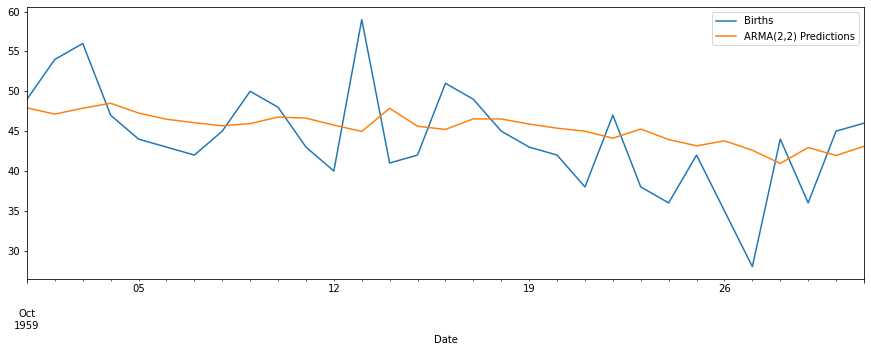

In [20]:
test['Births']['1959-10'].plot(legend=True,figsize=(15,5))
pred1['1959-10'].plot(legend=True,figsize=(15,5))

In [21]:
test.mean()

Births    42.705455
dtype: float64

In [22]:
pred1.mean()

43.390117668345006

<AxesSubplot:xlabel='Date'>

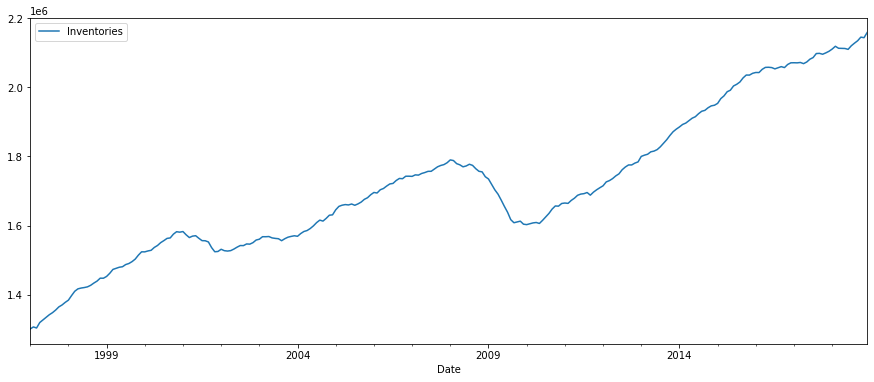

In [23]:
df2.plot(figsize=(15,6))

In [24]:
from statsmodels.tsa.statespace.tools import diff

In [25]:
df2['Diff']=diff(df2['Inventories'],k_diff=1)

In [26]:
df2

,Inventories,Diff
Date,,
1997-01-01,1301161,NaN
1997-02-01,1307080,5919.0
1997-03-01,1303978,-3102.0
1997-04-01,1319740,15762.0
1997-05-01,1327294,7554.0
...,...,...
2018-08-01,2127170,7552.0
2018-09-01,2134172,7002.0
2018-10-01,2144639,10467.0


In [27]:
adf_test(df2['Diff'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
result=seasonal_decompose(df2['Inventories'],model='add')

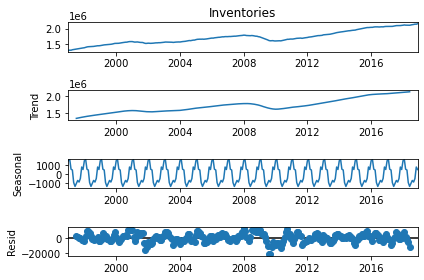

In [30]:
result.plot();

In [31]:
train2=df2.iloc[:250]
test2=df2.iloc[250:]

In [32]:
model2=ARIMA(train2['Inventories'].astype('float64'),order=(0,1,0))
result2=model2.fit()


In [33]:
start=len(train2)
end=len(train2)+len(test2)-1

In [34]:
pred2=result2.predict(start=start,end=end,typ='levels').rename("ARIMA(0,1,0) Predictions")

<AxesSubplot:xlabel='Date'>

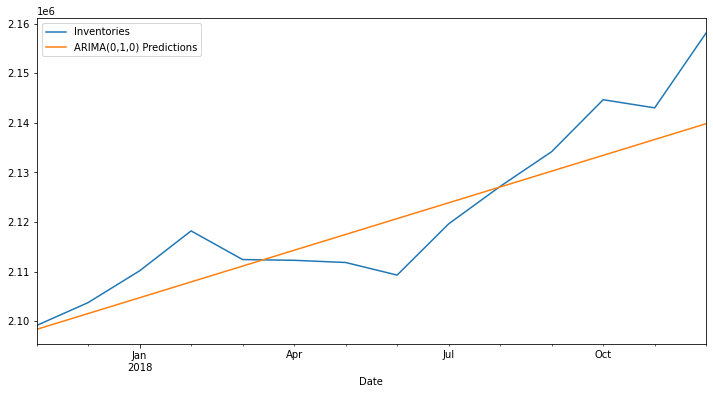

In [35]:
test2['Inventories'].plot(legend=True,figsize=(12,6))
pred2.plot(legend=True,figsize=(12,6))

### ERROR EVALUATION

In [36]:
from statsmodels.tools.eval_measures import rmse,mse

In [37]:
rmse(test2['Inventories'],pred2)

7758.200673749268

In [38]:
mse(test2['Inventories'],pred2)

60189677.694163606





### FORECASTING THE TIME SERIES USING ARIMA MODEL




In [39]:
model_pred=ARIMA(df2['Inventories'].astype('float64'),order=(0,1,0))

In [40]:
res_fore=model_pred.fit()

In [41]:
fore=res_fore.predict(start=len(df2),end=len(df2)+20,typ='levels').rename("ARIMA (0,1,0) Forecast (20 Days)")

<AxesSubplot:xlabel='Date'>

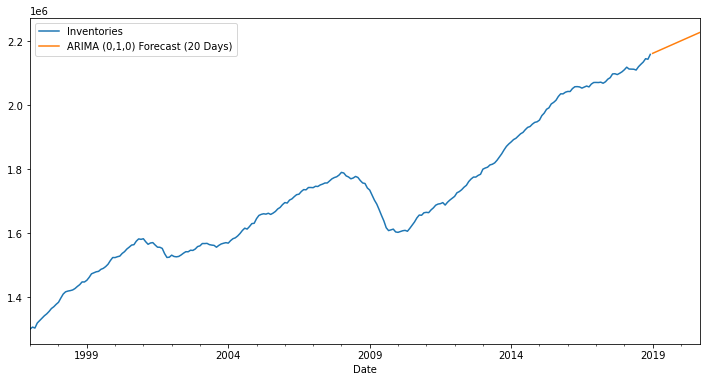

In [42]:
df2['Inventories'].plot(figsize=(12,6),legend=True)
fore.plot(figsize=(12,6),legend=True)